# Imports

In [1]:
import openpyxl as px

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
from sklearn.linear_model import LinearRegression

In [ ]:
from scipy.interpolate import Rbf

# Data

In [5]:
# # parsing the data from the excel file

# file = 'SoilCdataALcottonfield.xlsx'
# wb_obj = px.load_workbook(file, read_only=True, data_only=True)
# sheet_obj = wb_obj.active
# row = sheet_obj.max_row
# column = sheet_obj.max_column

# # column 1, sample ids
# # indexs start at row 14, and are formatted with numbers (location_id) - (sample_id) - (portion_id)
# # position ids are A-F
# # the row after position F is the entire sample
# # the row after the entire sample is the next location

# data = np.zeros((25, 5, 6, 5), dtype=object)
# sample_ids = []
# c_percents = []
# lats = []
# lons = []

# for location_id_row in range(25):
#     lat = sheet_obj.cell(row=location_id_row*35+14, column=2).value
#     lon = sheet_obj.cell(row=location_id_row*35+14, column=3).value
#     for sample_id_row in range(5):
#         for position_id_row in range(6):
#             row = location_id_row*35+sample_id_row*7+14+position_id_row
#             id_val = sheet_obj.cell(row=row, column=1).value
#             c_percent = sheet_obj.cell(row=row, column=8).value
#             sample_ids.append(id_val)
#             c_percents.append(c_percent)
#             data[location_id_row, sample_id_row, position_id_row, 0] = id_val

#             data[location_id_row, sample_id_row, position_id_row, 1] = float(c_percent)
#             data[location_id_row, sample_id_row, position_id_row, 2] = lat
#             data[location_id_row, sample_id_row, position_id_row, 3] = lon

# # this is an index of the depths of the samples
# # A= 0-5; B=5-10; C=10-15; D=15-20; E=20-25; F=25-30
# data[:, :, 0, 4] = -2.5
# data[:, :, 1, 4] = -7.5
# data[:, :, 2, 4] = -12.5
# data[:, :, 3, 4] = -17.5
# data[:, :, 4, 4] = -22.5
# data[:, :, 5, 4] = -27.5

# np.save('soil_data.npy', data)

# df = pd.DataFrame(data.reshape(-1, 5), columns=['id', 'c_percent', 'lat', 'lon', 'alt'])
# df['c_percent'] = df['c_percent'].astype(float)
# df['lat'] = df['lat'].astype(float)
# df['lon'] = df['lon'].astype(float)
# df['alt'] = df['alt'].astype(float)
# df['site'] = np.repeat(np.arange(25), 5*6)
# def sitt(string):
#     return string.split('-')[-1]
# df['site_alt'] = df['site'].astype(str) + '_' + df['id'].apply(sitt).astype(str)
# df['site_alt_id'] = df['id'].apply(sitt).astype(str)

# df.to_csv('soil_data.csv')

In [6]:
data = np.load('soil_data.npy', allow_pickle=True)
data.shape

(25, 5, 6, 5)

In [7]:
df = pd.read_csv('soil_data.csv', index_col=0)
df


,id,c_percent,lat,lon,alt,site,site_alt,site_alt_id
0,1-1-A,1.104222,32.419178,-85.414727,-2.5,0,0_A,A
1,1-1-B,0.475002,32.419178,-85.414727,-7.5,0,0_B,B
2,1-1-C,0.386305,32.419178,-85.414727,-12.5,0,0_C,C
3,1-1-D,0.310593,32.419178,-85.414727,-17.5,0,0_D,D
4,1-1-E,0.333903,32.419178,-85.414727,-22.5,0,0_E,E
...,...,...,...,...,...,...,...,...
745,25-5-B,0.579120,32.423816,-85.415641,-7.5,24,24_B,B
746,25-5-C,0.620252,32.423816,-85.415641,-12.5,24,24_C,C
747,25-5-D,0.372506,32.423816,-85.415641,-17.5,24,24_D,D
748,25-5-E,0.058559,32.423816,-85.415641,-22.5,24,24_E,E


In [8]:
site_stats = df.groupby('site_alt').agg({
    'c_percent': ['mean', 'std', 'min', 'max'],
    'lat': 'first',
    'lon': 'first',
    'alt': 'first',
    'site_alt_id': 'first'
}).reset_index()
site_stats.columns = ['site', 'c_percent_mean', 'c_percent_std', 'c_percent_min', 'c_percent_max', 'lat', 'lon', 'alt', 'site_alt_id']

In [9]:
a_site_stats = site_stats[site_stats['site_alt_id'] == 'A']

In [10]:
df

,id,c_percent,lat,lon,alt,site,site_alt,site_alt_id
0,1-1-A,1.104222,32.419178,-85.414727,-2.5,0,0_A,A
1,1-1-B,0.475002,32.419178,-85.414727,-7.5,0,0_B,B
2,1-1-C,0.386305,32.419178,-85.414727,-12.5,0,0_C,C
3,1-1-D,0.310593,32.419178,-85.414727,-17.5,0,0_D,D
4,1-1-E,0.333903,32.419178,-85.414727,-22.5,0,0_E,E
...,...,...,...,...,...,...,...,...
745,25-5-B,0.579120,32.423816,-85.415641,-7.5,24,24_B,B
746,25-5-C,0.620252,32.423816,-85.415641,-12.5,24,24_C,C
747,25-5-D,0.372506,32.423816,-85.415641,-17.5,24,24_D,D
748,25-5-E,0.058559,32.423816,-85.415641,-22.5,24,24_E,E


In [11]:
site_stats

,site,c_percent_mean,c_percent_std,c_percent_min,c_percent_max,lat,lon,alt,site_alt_id
0,0_A,0.759183,0.202864,0.564546,1.104222,32.419178,-85.414727,-2.5,A
1,0_B,0.399184,0.055245,0.358526,0.475002,32.419178,-85.414727,-7.5,B
2,0_C,0.396658,0.068295,0.320139,0.468539,32.419178,-85.414727,-12.5,C
3,0_D,0.327897,0.119934,0.147849,0.446639,32.419178,-85.414727,-17.5,D
4,0_E,0.289437,0.173208,0.097421,0.496263,32.419178,-85.414727,-22.5,E
...,...,...,...,...,...,...,...,...,...
145,9_B,0.585546,0.163796,0.304759,0.719464,32.419811,-85.416027,-7.5,B
146,9_C,0.455923,0.125591,0.322285,0.647225,32.419811,-85.416027,-12.5,C
147,9_D,0.429216,0.118666,0.260586,0.588530,32.419811,-85.416027,-17.5,D
148,9_E,0.326836,0.137443,0.166724,0.505081,32.419811,-85.416027,-22.5,E


In [12]:
a_site_stats

,site,c_percent_mean,c_percent_std,c_percent_min,c_percent_max,lat,lon,alt,site_alt_id
0,0_A,0.759183,0.202864,0.564546,1.104222,32.419178,-85.414727,-2.5,A
6,10_A,0.656695,0.201121,0.470259,0.964967,32.420261,-85.413971,-2.5,A
12,11_A,0.948865,0.383564,0.627369,1.596885,32.419891,-85.414952,-2.5,A
18,12_A,0.954124,0.193109,0.804027,1.267367,32.424191,-85.418357,-2.5,A
24,13_A,0.642784,0.145905,0.424855,0.822481,32.423233,-85.417794,-2.5,A
30,14_A,0.868540,0.141591,0.671202,0.999615,32.422263,-85.417299,-2.5,A
36,15_A,0.953590,0.205384,0.673621,1.161161,32.421338,-85.416801,-2.5,A
42,16_A,0.719580,0.145019,0.559687,0.893513,32.420978,-85.416095,-2.5,A
48,17_A,0.866636,0.146379,0.661137,1.042919,32.423318,-85.416880,-2.5,A
54,18_A,0.786524,0.152202,0.606043,0.986294,32.422333,-85.416391,-2.5,A


# Data Inspection

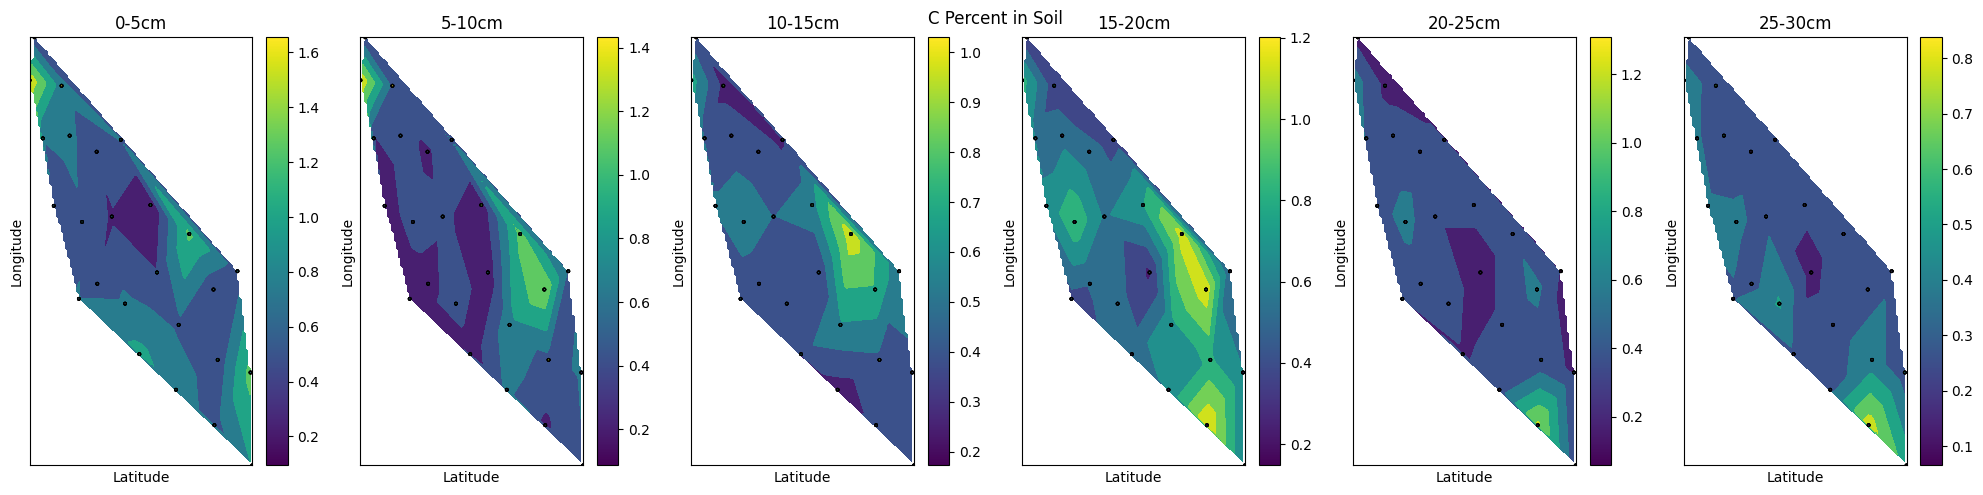

In [13]:
# layer = 0
n_layer = data.shape[2]
layer_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

fig, ax = plt.subplots(1, n_layer, figsize=(20, 5))
for layer in range(n_layer):
    z = data[:, :, layer, 1].astype(float).flatten()
    x = data[:, :, layer, 2].astype(float).flatten()
    y = data[:, :, layer, 3].astype(float).flatten()
    npts = 125
    ngridx = 100
    ngridy = 200
    xi = np.linspace(x.min(), x.max(), ngridx)
    yi = np.linspace(y.min(), y.max(), ngridy)
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z, trifinder=triang.get_trifinder())
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    
    ax[layer].set_title(layer_labels[layer]+'cm')
    ax[layer].set_xlim(x.min(), x.max())
    ax[layer].set_xticks([])
    ax[layer].set_ylim(y.min(), y.max())
    ax[layer].set_yticks([])
    ax[layer].set_xlabel('Latitude')
    ax[layer].set_ylabel('Longitude')
    ax[layer].contourf(xi, yi, zi, levels=5)
    # ax[layer].contour(xi, yi, zi, levels=100, linewidths=0.5)
    fig.colorbar(ax[layer].scatter(x, y, c=z, s=3, edgecolors='k'), ax=ax[layer])
fig.tight_layout()
fig.suptitle('C Percent in Soil')
plt.show()

In [14]:
data.shape

(25, 5, 6, 5)

In [15]:
lowest = np.min(np.min(data[:, :, :, 1], axis=-1), axis=-1)
highest = np.max(np.max(data[:, :, :, 1], axis=-1), axis=-1)

In [16]:
from scipy.interpolate import Rbf


In [17]:
rbf = Rbf(data[:, 0, 0, 2].astype(float), data[:, 0, 0, 3].astype(float), lowest.astype(float), function='linear')

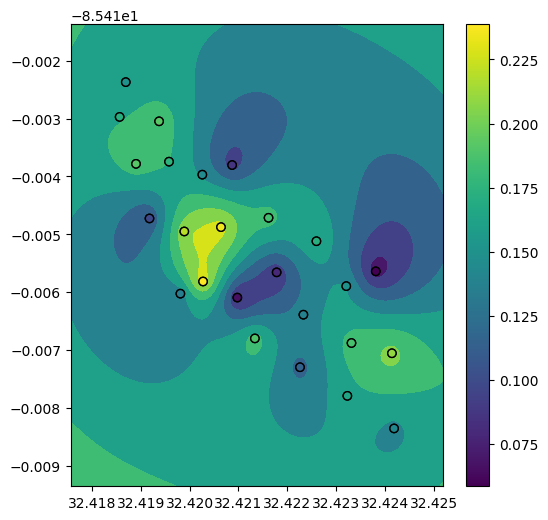

In [18]:
pad = 0.001
xi = np.linspace(data[:, 0, 0, 2].astype(float).min()-pad, data[:, 0, 0, 2].astype(float).max()+pad, 100)
yi = np.linspace(data[:, 0, 0, 3].astype(float).min()-pad, data[:, 0, 0, 3].astype(float).max()+pad, 100)
xi, yi = np.meshgrid(xi, yi)
zi = rbf(xi, yi)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.contourf(xi, yi, zi)
# draw the points
ax.scatter(data[:, 0, 0, 2].astype(float), data[:, 0, 0, 3].astype(float), c=lowest.astype(float), edgecolors='k')
fig.colorbar(ax.scatter(data[:, 0, 0, 2].astype(float), data[:, 0, 0, 3].astype(float), c=lowest.astype(float), edgecolors='k'), ax=ax)


plt.xlim(data[:, 0, 0, 2].astype(float).min()-pad, data[:, 0, 0, 2].astype(float).max()+pad)
plt.ylim(data[:, 0, 0, 3].astype(float).min()-pad, data[:, 0, 0, 3].astype(float).max()+pad)
plt.show()

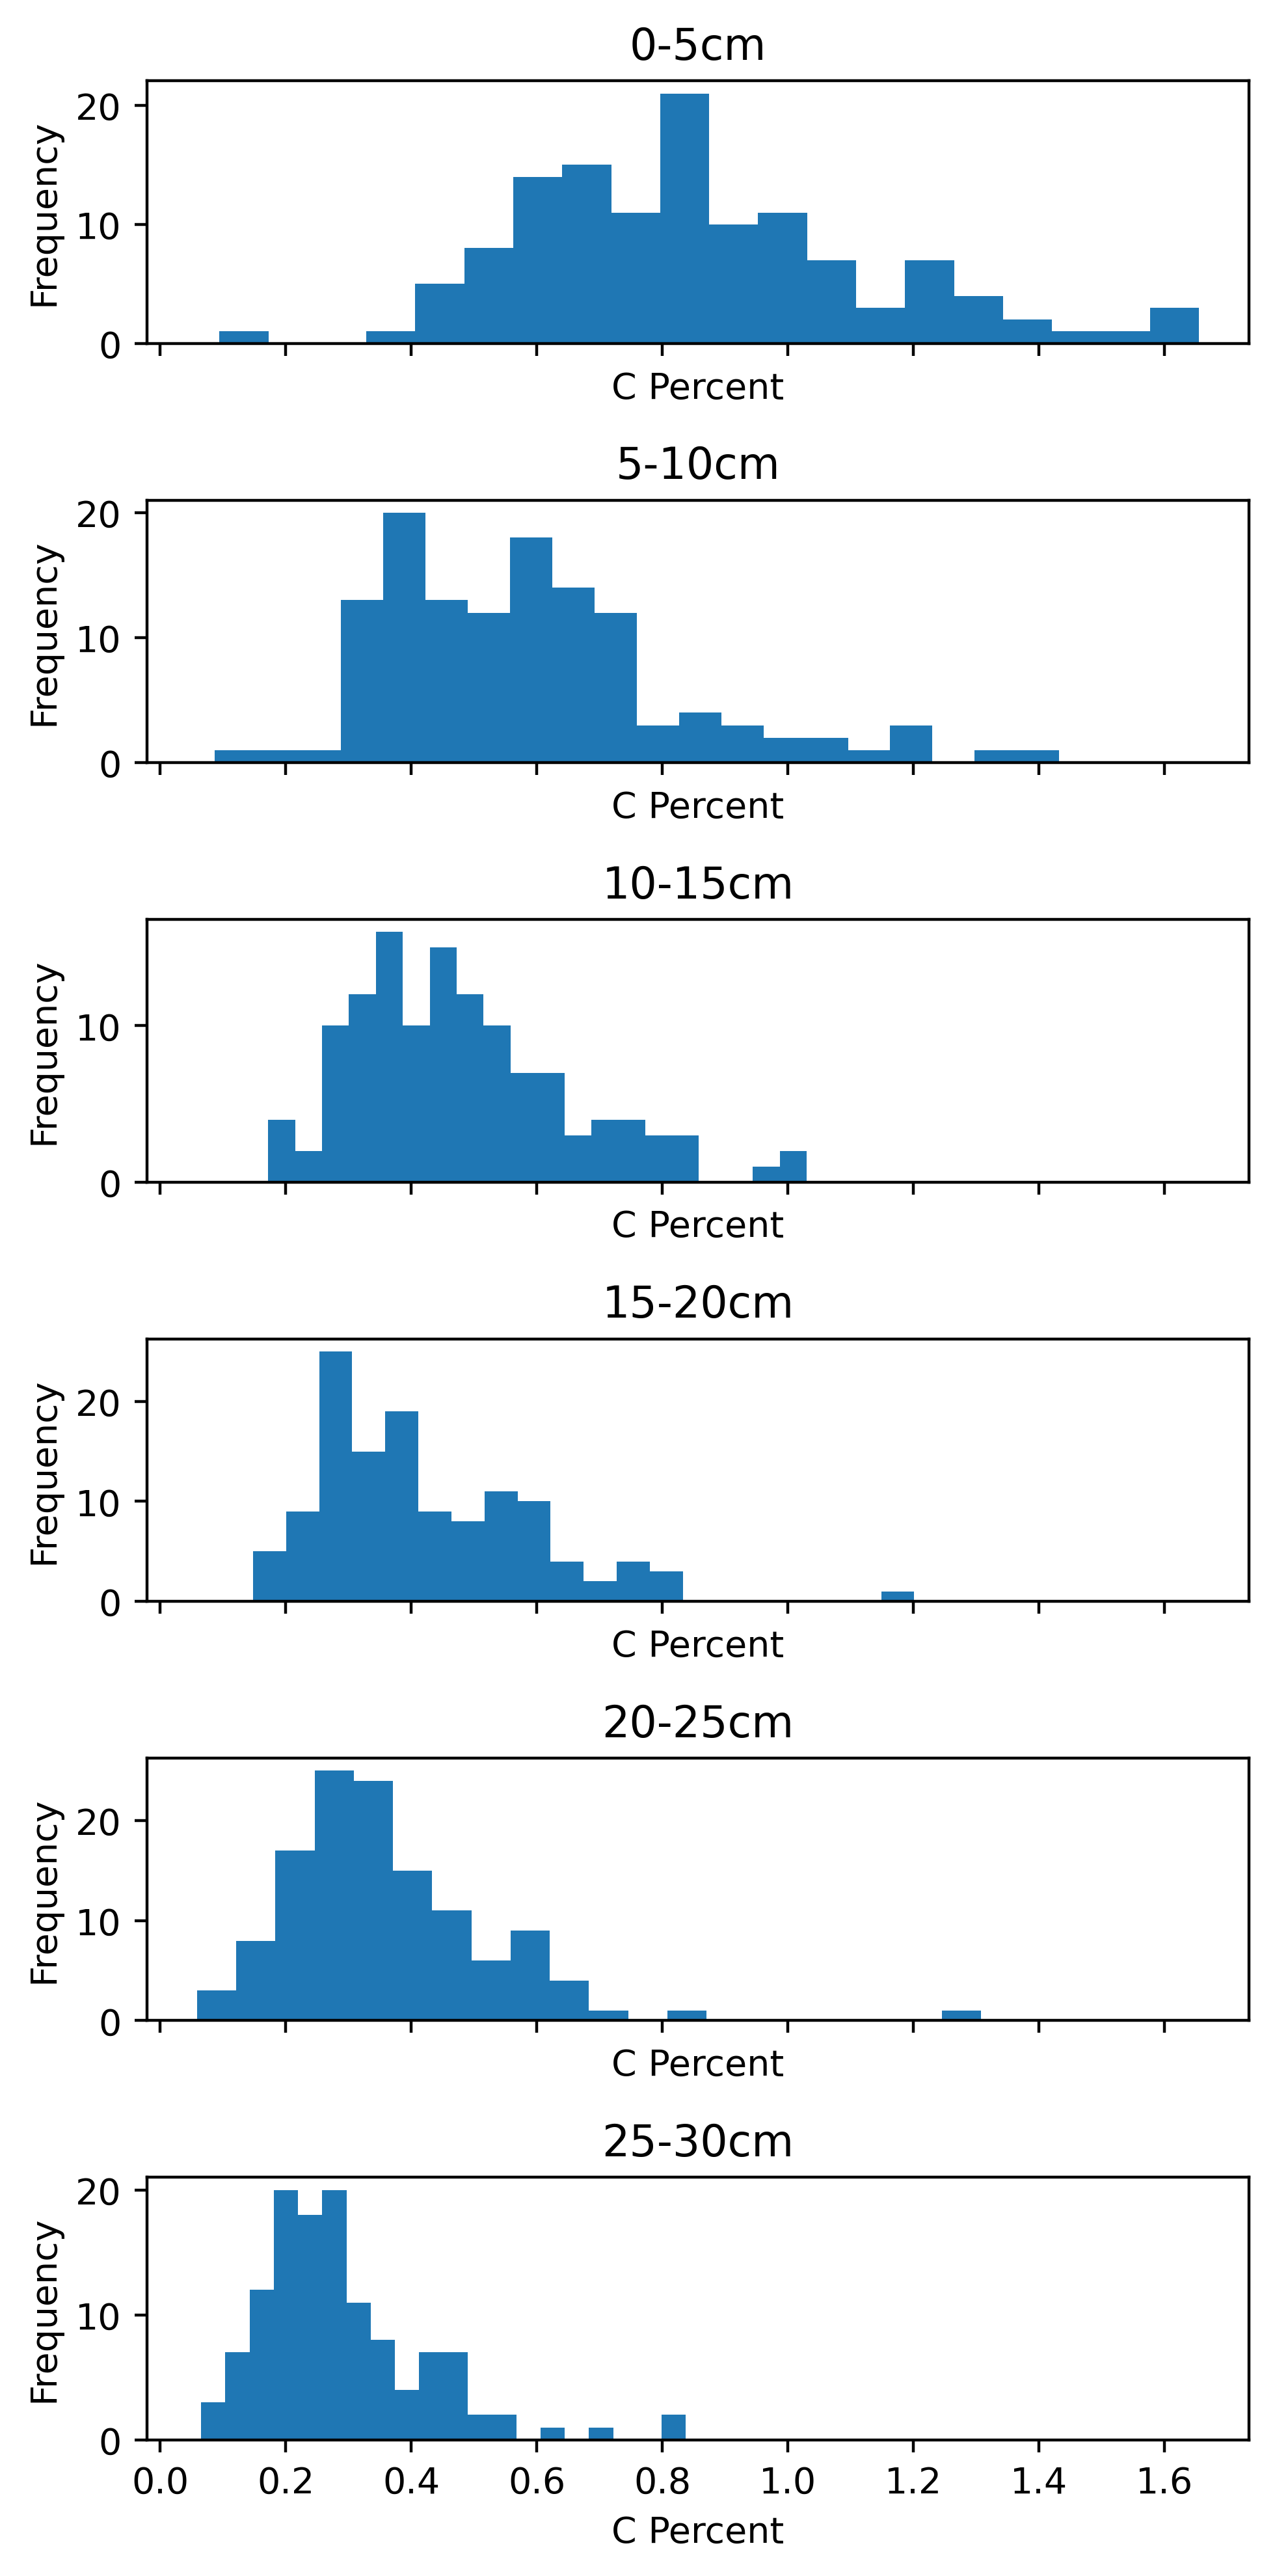

In [19]:
n_layer = data.shape[2]
layer_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
fig, ax = plt.subplots(n_layer, 1, figsize=(5, 10), sharex=True, dpi=400)

for layer in range(n_layer):
    ax[layer].hist(data[:, :, layer, 1].flatten(), bins=20)
    ax[layer].set_title(layer_labels[layer]+'cm')
    ax[layer].set_xlabel('C Percent')
    ax[layer].set_ylabel('Frequency')
fig.tight_layout()
# fig.suptitle('C Percent in Soil')
plt.show()

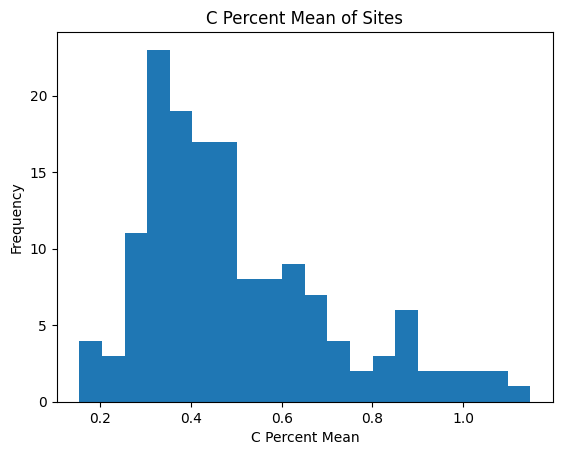

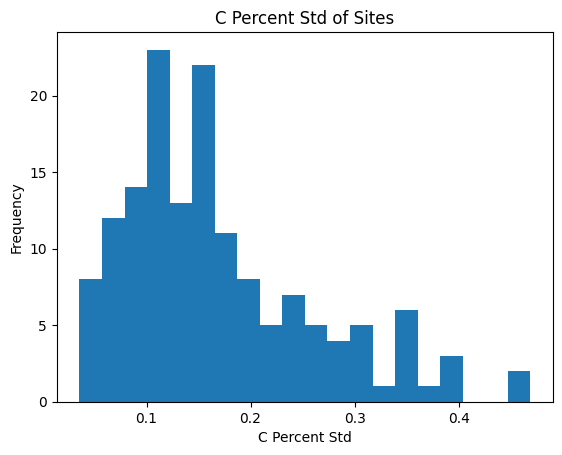

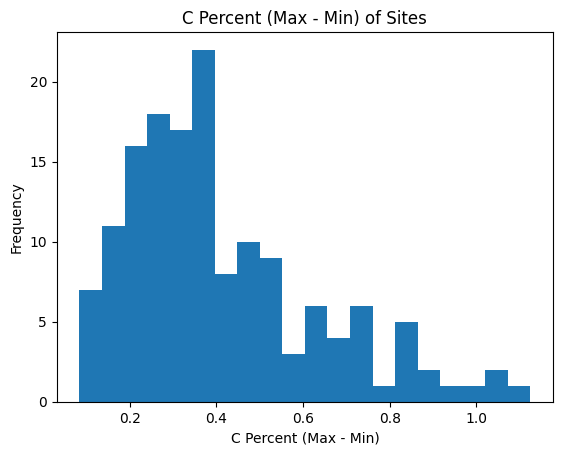

In [20]:
# graph hist of c_percent_mean
plt.hist(site_stats['c_percent_mean'], bins=20)
plt.xlabel('C Percent Mean')
plt.ylabel('Frequency')
plt.title('C Percent Mean of Sites')
plt.show()

# graph hist of c_percent_std
plt.hist(site_stats['c_percent_std'], bins=20)
plt.xlabel('C Percent Std')
plt.ylabel('Frequency')
plt.title('C Percent Std of Sites')
plt.show()

plt.hist(site_stats['c_percent_max'] - site_stats['c_percent_min'], bins=20)
plt.xlabel('C Percent (Max - Min)')
plt.ylabel('Frequency')
plt.title('C Percent (Max - Min) of Sites')
plt.show()


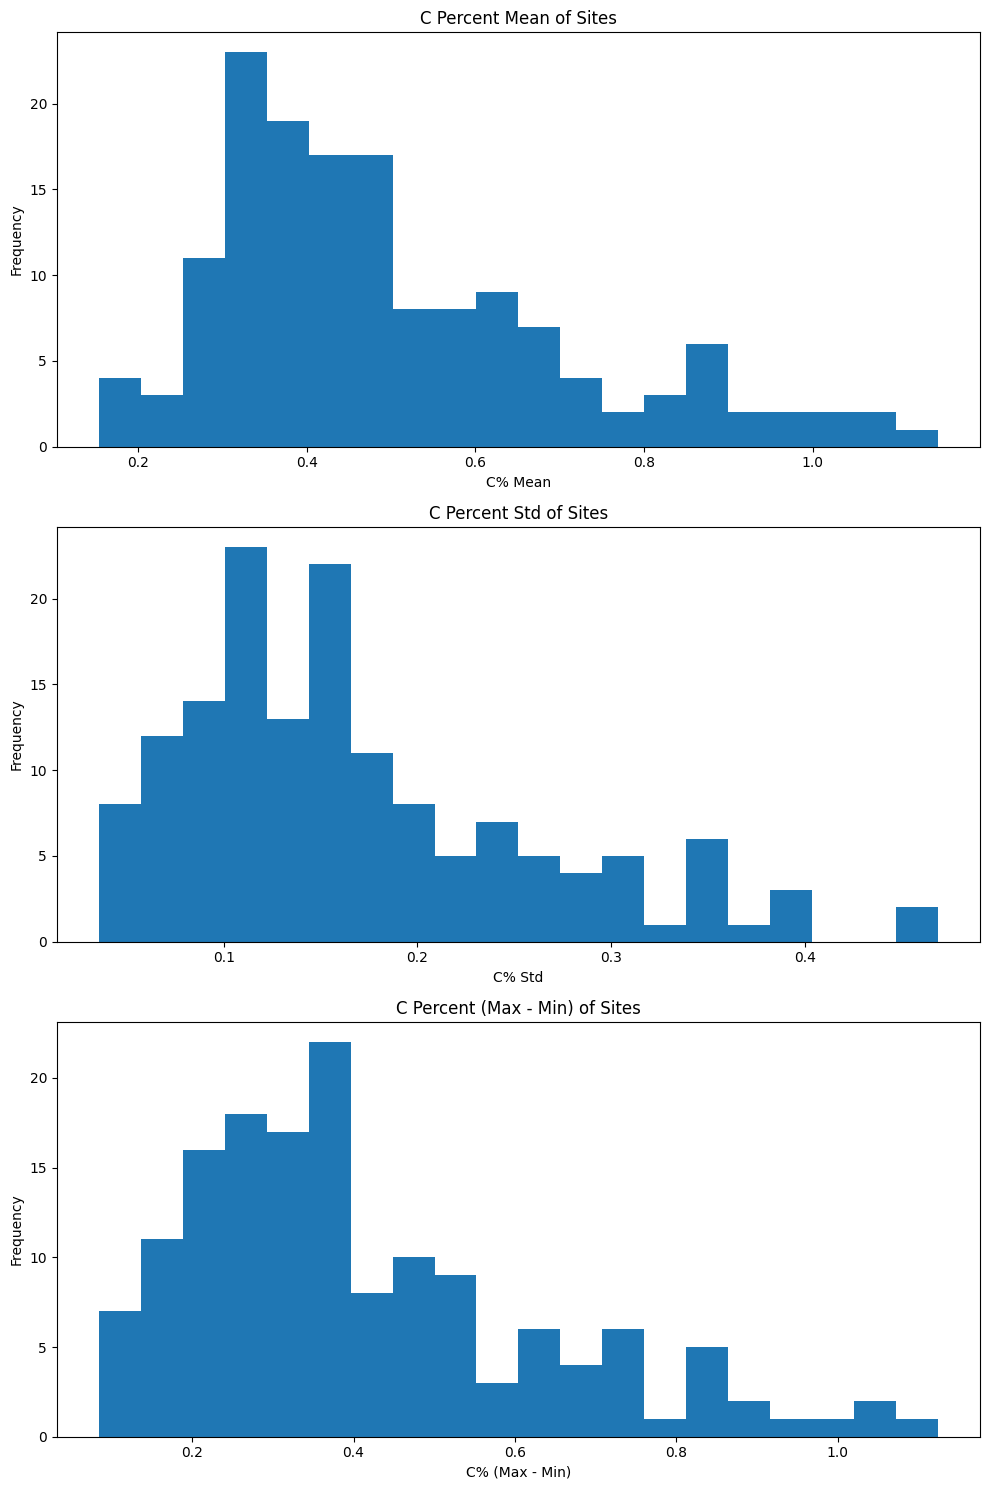

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# graph hist of c_percent_mean
ax[0].hist(site_stats['c_percent_mean'], bins=20)
ax[0].set_xlabel('C% Mean')
ax[0].set_ylabel('Frequency')
ax[0].set_title('C Percent Mean of Sites')

# graph hist of c_percent_std
ax[1].hist(site_stats['c_percent_std'], bins=20)
ax[1].set_xlabel('C% Std')
ax[1].set_ylabel('Frequency')
ax[1].set_title('C Percent Std of Sites')

# graph hist of c_percent_max - c_percent_min
ax[2].hist(site_stats['c_percent_max'] - site_stats['c_percent_min'], bins=20)
ax[2].set_xlabel('C% (Max - Min)')
ax[2].set_ylabel('Frequency')
ax[2].set_title('C Percent (Max - Min) of Sites')

plt.tight_layout()
plt.show()


In [22]:
# core:
# 	30 inch rod used to harvest soil
# trial:
# 	5 cores are harvested at each location
# cylinder:
# 	6 vertical sections of the core, each 5 inch length that are individually tested

# An explination of graph:

# Contour plots are used to graph the amounts of carbon found in a field from core sampling.
# These plots are generated from the top cylinders from the cores.
# The left plot is generated from the average of the harvested samples, the middle by picking the lowest, then highest on the right.

# suptitle = 'C Percent in Soil (Top Cylinder) by Sample (Average, Lowest, Highest)'

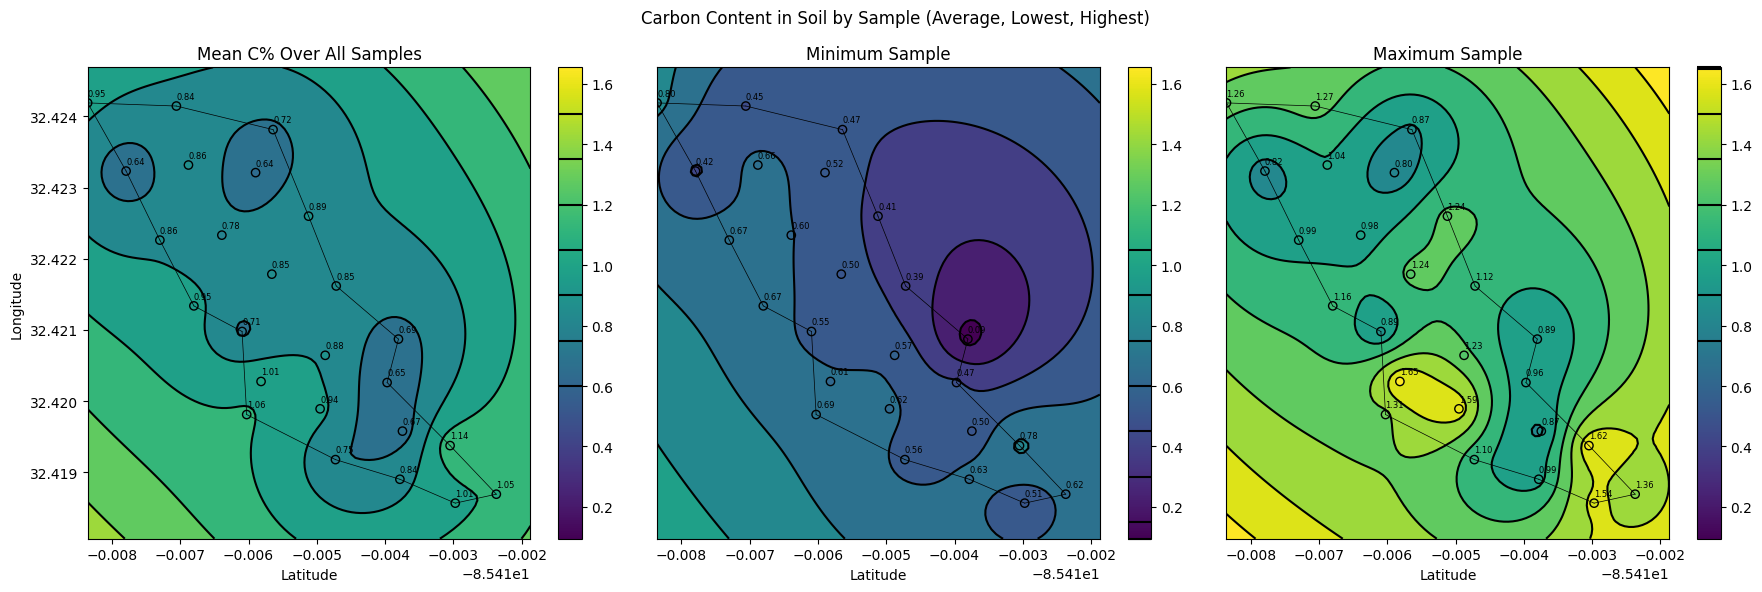

In [23]:
# make the contour plot of the c_percent_mean, c_percent_min, c_percent_max
# different layout options: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, ax = plt.subplots(1, 3, figsize=(18, 6), layout='tight')
frame = a_site_stats

y = frame['lat']
x = frame['lon']

cols = ['c_percent_mean', 'c_percent_min', 'c_percent_max']

vmin = frame[cols].min().min()
vmax = frame[cols].max().max()
pad = 0.0005

line_starts = [0, 144, 42, 36, 30, 24, 18, 60, 96, 84, 90, 126, 6, 120, 108, 102, 66]
line_ends = line_starts[1:] + [line_starts[0]]

plot_titles = ['Mean C% Over All Samples','Minimum Sample', 'Maximum Sample']
contours = []
xi = np.linspace(x.min(), x.max() + pad, 100)
yi = np.linspace(y.min() - pad, y.max() + pad, 100)

for i, col in enumerate(cols):
    rbf = Rbf(x.to_numpy().astype(float), y.to_numpy().astype(float), frame[col].to_numpy().astype(float), function='linear')
    
    Xi, Yi = np.meshgrid(xi, yi)
    zi = rbf(Xi, Yi)
    
    contourf = ax[i].contourf(Xi, Yi, zi, levels=6, cmap='viridis', vmin=vmin, vmax=vmax)
    contour = ax[i].contour(contourf, colors='k')

    scatter = ax[i].scatter(x, y, c=frame[col], edgecolors='k', cmap='viridis', vmin=vmin, vmax=vmax)
    bar = fig.colorbar(scatter, ax=ax[i])
    bar.add_lines(contour)
    ax[i].set_title(plot_titles[i])

    # label the points
    for j, txt in enumerate(frame[col]):
        ax[i].annotate(str(txt)[:4], (x.iloc[j], y.iloc[j]+.0001), fontsize=6)
    
    # draw the lines
    for start, end in zip(line_starts, line_ends):
        ax[i].plot(x.loc[[start, end]], y.loc[[start, end]], 'k-', linewidth=0.5)
    
    ax[i].set_xlabel('Latitude')
    # ax[i].set_ylabel('Longitude')
    # yticks = ax[i].get_yticks()

    # ax[i].set_yticks(yticks, [])
    # yticks = np.round(yticks, 4)
    if i > 0:
        ax[i].set_yticks([], [])

ax[0].set_ylabel('Longitude')

# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
# bar = fig.colorbar(scatter, cax=cbar_ax, label='C %')
# for contour in contours:
#     bar.add_lines(contour)
plt.suptitle('Carbon Content in Soil by Sample (Average, Lowest, Highest)')
plt.show()


# pretty graphs

In [24]:
def dms_to_decimal(degrees, minutes, seconds, direction):
    """
    Convert latitude or longitude from degrees, minutes, and seconds to decimal degrees.
    
    Parameters:
    degrees (int): Degrees part of the coordinate
    minutes (int): Minutes part of the coordinate
    seconds (float): Seconds part of the coordinate
    direction (str): Direction part of the coordinate ('N', 'S', 'E', 'W')
    
    Returns:
    float: Decimal degrees
    """
    decimal = degrees + minutes / 60 + seconds / 3600
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal

# # Example usage:
# latitude = dms_to_decimal(32, 25, 5.4, 'N')
# longitude = dms_to_decimal(85, 25, 12, 'W')
# print(f"Latitude: {latitude}, Longitude: {longitude}")

def decimal_to_dms(decimal, is_latitude=True):
    """
    Convert decimal degrees to degrees, minutes, and seconds.
    
    Parameters:
    decimal (float): Decimal degrees
    is_latitude (bool): True if the coordinate is latitude, False if longitude
    
    Returns:
    tuple: Degrees, minutes, seconds, direction
    """
    degrees = int(decimal)
    minutes = int((decimal - degrees) * 60)
    seconds = (decimal - degrees - minutes / 60) * 3600
    direction = 'N' if is_latitude else 'E'
    if decimal < 0:
        direction = 'S' if is_latitude else 'W'
        degrees = -degrees
    return degrees, minutes, seconds, direction

# # Example usage:
# lat_dms = decimal_to_dms(latitude, is_latitude=True)
# lon_dms = decimal_to_dms(longitude, is_latitude=False)
# print(f"Latitude DMS: {lat_dms}, Longitude DMS: {lon_dms}")

In [25]:
# imshow for feild/background.png

# pixel - lat (N) - lon (W)
# 962, 1267 - 32, 24, 58 - 85, 24, 38
# 102, 1267 - 32, 24, 58 - 85, 25, 12
# 102, 125 - 32, 25, 35 - 85, 25, 12
# 962, 125 - 32, 25, 35 - 85, 24, 38 

# W / x
# 102; 85, 25, 12; -85.42000000000002
# 962; 85, 24, 38; -85.41055555555556 

# N / y
# 125; 32, 25, 35; 32.41611111111111
# 1267; 32, 24, 58; 32.42638888888889

# use linear regression to find the lat, lon of the pixel 0, 0


In [71]:
# imshow for feild/background.png
figsize = (10.68*3, 14.14)
dpi = 100 #100 default
resolution = (int(figsize[0]*dpi), int(figsize[1]*dpi))

model = LinearRegression()

model.fit(np.array([[125, 1267]]), np.array([[32.41611111111111, 32.42638888888889]]))
bottom, top = model.predict(np.array([[0, resolution[0]]]))[0]
model = LinearRegression()
model.fit(np.array([[102, 962]]), np.array([[-85.42000000000002, -85.41055555555556]]))
left, right = model.predict(np.array([[0, resolution[1]]]))[0]

In [72]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

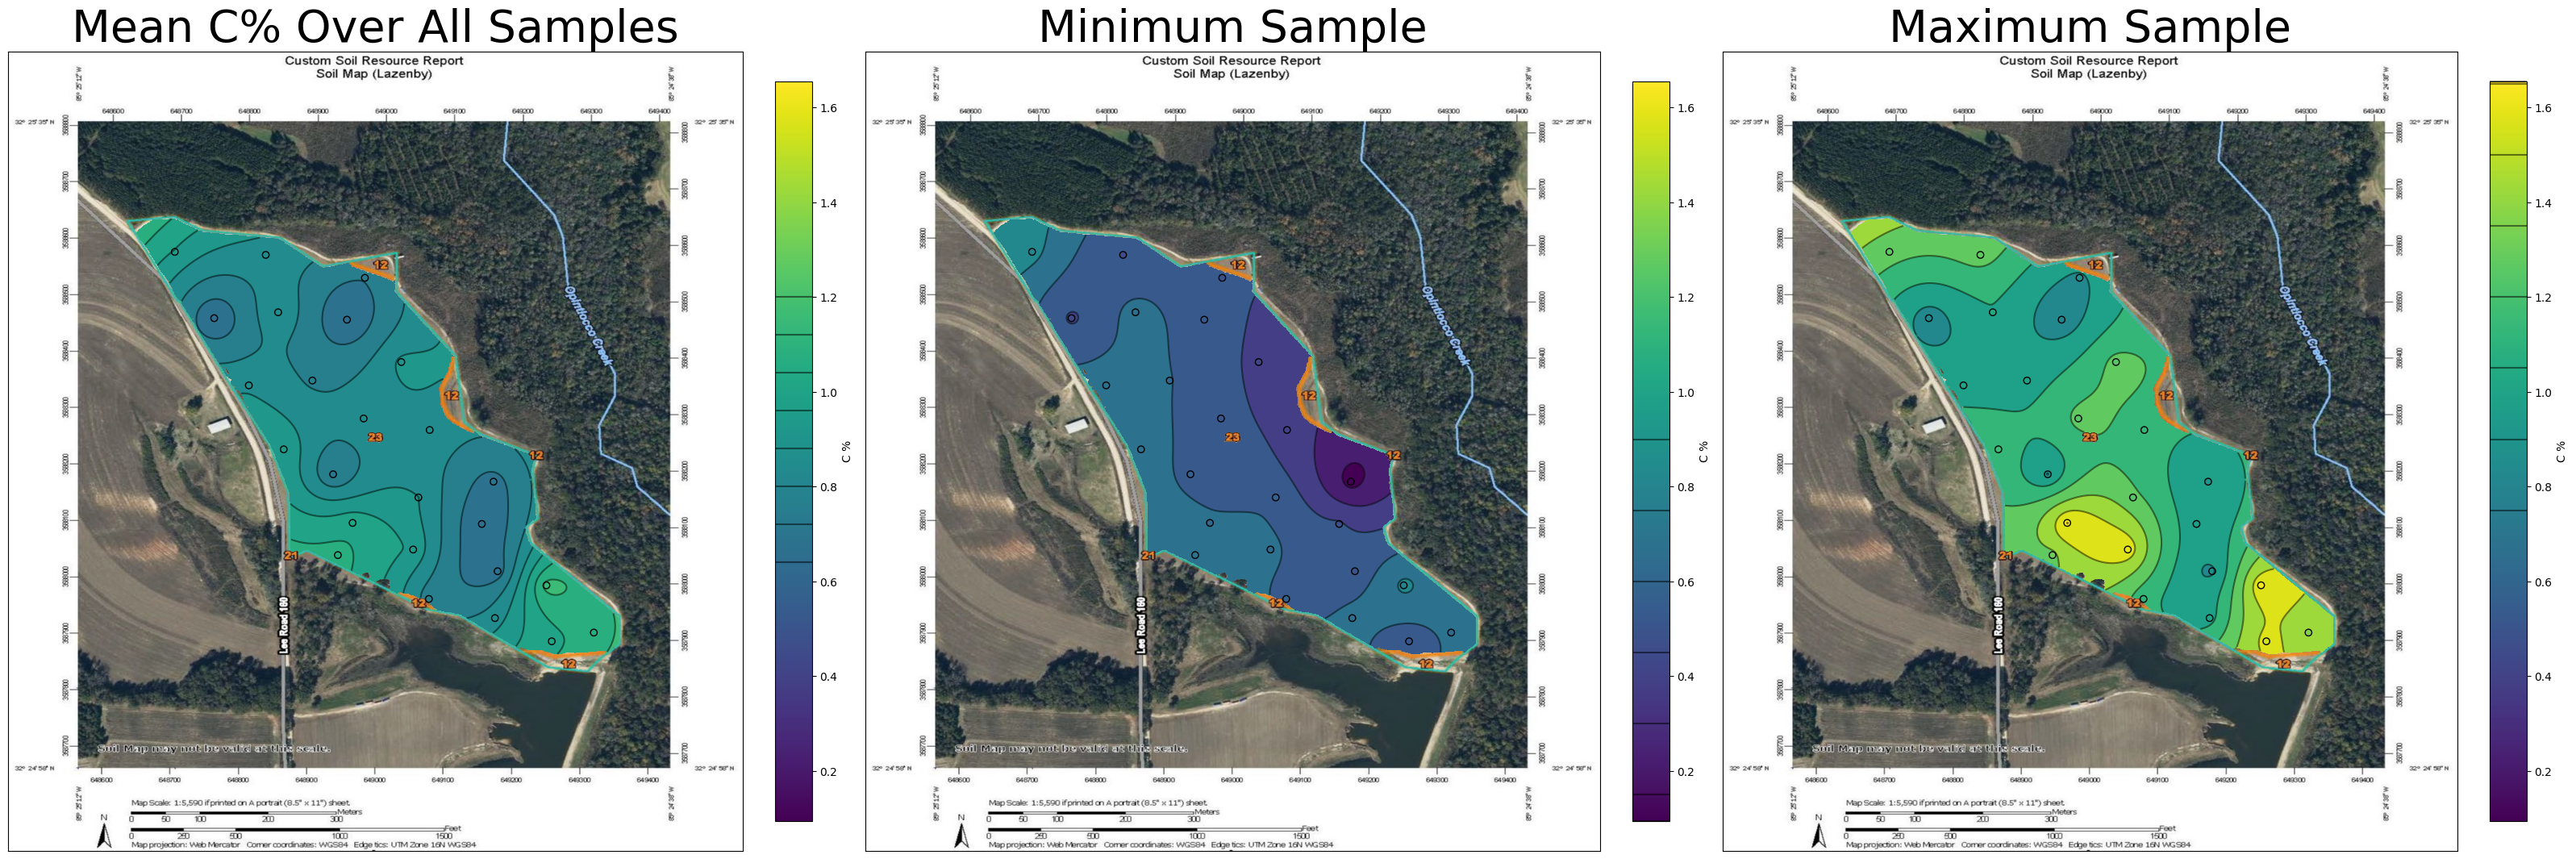

In [84]:
mask = plt.imread('feild/feild.png')[::-1][:, :, -1].astype(bool)

cols = ['c_percent_mean', 'c_percent_min', 'c_percent_max']
plot_titles = ['Mean C% Over All Samples','Minimum Sample', 'Maximum Sample']

fig, ax = plt.subplots(1, len(cols), figsize=figsize, dpi=dpi)


xi = np.linspace(left, right, 1068)
yi = np.linspace(bottom, top, 1414)

x = frame['lon'].to_numpy().astype(float)
y = frame['lat'].to_numpy().astype(float)

min_x = x.min()
x = x - min_x
x = x*0.9
x = x + min_x
x+=0.0005

min_y = y.min()
y = y - min_y
y = y*0.89
y = y + min_y
y+=0.00024

for i, col in enumerate(cols):
    z = frame[col].to_numpy().astype(float)
    rbf = Rbf(x, y, z, function='linear')
    Xi, Yi = np.meshgrid(xi, yi)
    zi = rbf(Xi, Yi)
    zi = np.ma.array(zi, mask=~mask)
    ax[i].contourf(Xi, Yi, zi, levels=6, cmap='viridis', vmin=vmin, vmax=vmax, alpha=1)
    contour = ax[i].contour(Xi, Yi, zi, levels=6, colors='k', alpha=0.5)
    # ax[i].imshow(plt.imread('feild/feild.png'), alpha=1, extent=[left, right, bottom, top])
    scatter = ax[i].scatter(x, y, c=z, edgecolors='k', cmap='viridis', vmin=vmin, vmax=vmax)
    ax[i].imshow(plt.imread('feild/background.png'), alpha=1, extent=[left, right, bottom, top])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    # ax[i].set_title(plot_titles[i], fontsize=2)

    # make colorbar smaller
    bar = fig.colorbar(scatter, ax=ax[i], fraction=0.046, pad=0.04, label='C %')
    bar.add_lines(contour)
    ax[i].set_title(plot_titles[i], fontsize=40)
    

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()